# Import Frameworks

In [408]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt    
import matplotlib.patches as pat
import seaborn as sns;sns.set()

In [2]:
from  warnings import filterwarnings
filterwarnings("ignore")

# Probability Introduction 

# Combinatorics

# Probability

## Distribution
The possible values a variable can take and how frequently they occur.<br>
<h3>Notation:</h3>

**Y**:The actual outcome of an event.<br>
**y**:One of the possible outcomes.<br>
P(Y=y) or p(y)


#### Probability Density Function (PDF):
Describes the likelihood of a countinous random variables taking a specific value.<br>
The area under the PDF over a range gives the probability of the variable falling within that range.
#### Probability Mass Function (PMF):
Represents the probability of a discrete random variable taking a particular value.<br>
It assigns probabilities directly to each possible value.
#### Cumulative Distribution Function (PDF):
Gives the probability that a random variable is less than or equal to a specific value.<br>
It applies to both continuous and discrete variables.

### Mean
shifts it right or left(its the **center** value).

### Standard Deviation
controls the **spread**.

#### Big Std:
The more congested the middle of the distribution.<br>
The more data falls within that interval.

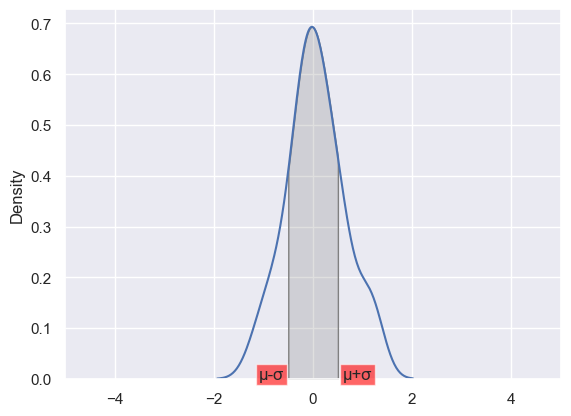

In [94]:
small_std = .5
normal_thin = np.random.normal(loc=0,scale=small_std,size=50)
sns.kdeplot(normal_thin)
sns.kdeplot(normal_thin,fill=True,color='grey',clip=(-small_std,small_std))
plt.text(x=-small_std-.6,y=0,s='μ-σ',bbox={'facecolor':'red','pad':2,'alpha':0.6})
plt.text(x=small_std+.1,y=0,s='μ+σ',bbox={'facecolor':'red','pad':2,'alpha':0.6})
plt.xlim((-5,5))
plt.show()

#### Small Std:
The less data falls within the interval.<br>
The more dispersed the data is.

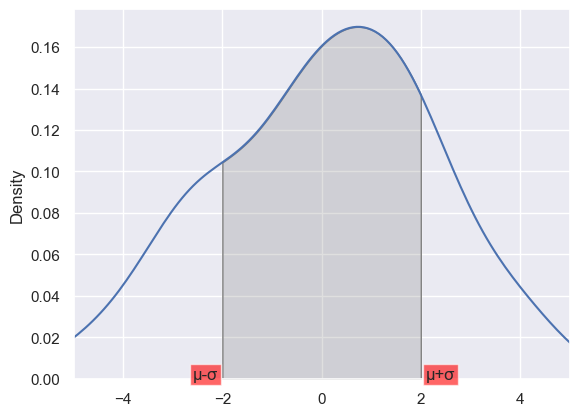

In [93]:
big_std = 2
normal_wide = np.random.normal(loc=0,scale=big_std,size=50)
sns.kdeplot(normal_wide)
sns.kdeplot(normal_wide,fill=True,color='grey',clip=(-big_std,big_std))
plt.text(x=-big_std-.6,y=0,s='μ-σ',bbox={'facecolor':'red','pad':2,'alpha':0.6})
plt.text(x=big_std+.1,y=0,s='μ+σ',bbox={'facecolor':'red','pad':2,'alpha':0.6})
plt.xlim((-5,5))
plt.show()

## Types of Probability Distributions
**Discrete Distributions:** Finite number of outcomes.<br>
Its a bars.
<ul><pre>-Uniform
-Bernoulli
-Binomial
-Poisson
</ul>

**Continuous Distributions:** Infinite many outcomes.<br>
Its a Curve.
<ul><pre>-Normal(Gaussian)
-Student's T
-Chi-Squared
-Exponential
-Logistic
</ul>

#### Notation:
**X ~ N (μ+σ2)**<br>
<br>
**X** = Variable.<br>
**N** = Distribution Type.<br>
**(μ+σ2)** = Characteristics(may vary).

### Uniform Distribution:
**Type**:Continous or Discrete.<br>
**Parameters**:<ul><pre>
a:lower bound.
b:upper bound.</ul>
**Range**:<ul><pre>
Countinous:[a,b].
Discrete:{a,a+1,...,b}.</ul>
**Notation**:<ul><pre>
**Continuous:** X ~ U(a,b).
**Discrete:** X ~ U{a,b}.</ul>
**Formulas**:<ul><pre>
**Continuous:**:<ul>
**PDF**: f(x) = {
    1/(b-a),if x ⋳ [a,b]
    0      ,otherwise}
**CDF**: F(X) = {
    0           ,if x < a
    (x-a)/(b-a) ,if [a,b]
    1           ,if x > b}</ul>
**Discrete:**<ul>
**PMF**: P(X=x) = 1 / (b-a+1),for x ⋳ {a,a+1,...,b}.
**CDF**: F(X <= x) = {
     0                      ,if x < 0
     (abs(x)-a+1) / (b-a+1) ,if a <= x <= b
     1                      ,if x > b}</ul></ul>
**Shape**:Flat,all outcomes are equally likey.<br>
**Mean**:(a+b)/2.<br>
**Variance**:((b-a)**2)/12.<br>
**Use Cases**:Modeling random varaibles with equally likey outcomes(eg:rolling a fair die).<br>

PDF at 
	x=3:0.3333333333333333
CDF at 
	x=3:0.6666666666666666
Mean=3.5
Var=0.75


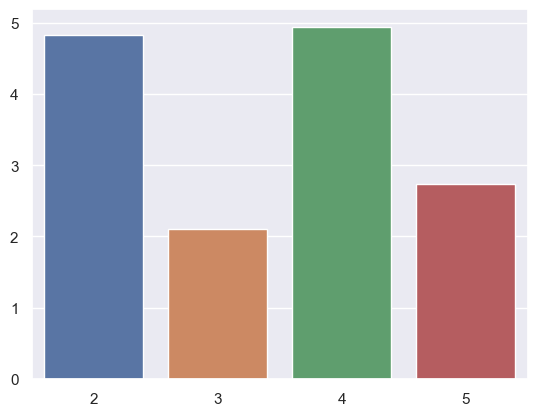

In [201]:
# Parameters 
a = 2
b = 5

# Create a Uniform Distribution
uniform = stats.uniform(loc=a,scale=b-a)

# PDF for x = 2
pdf_4 = uniform.pdf(4)

# PDF for x = 2
cdf_4 = uniform.cdf(4)

print(f"PDF at \n\tx=3:{pdf_4}")
print(f"CDF at \n\tx=3:{cdf_4}")

# Mean and Variance
print(f"Mean={(uniform.mean())}")
print(f"Var={uniform.var()}")

# Generate random Samples
size = b-a+1
x = np.arange(a,b+1)
samples = uniform.rvs(size)

# Plot Distribution
sns.barplot(x=x,y=samples)
plt.xticks()
plt.show()

### Bernoulli Distribution:
**Type**:Discrete.<br>
**Parameters**:<ul><pre>
p:probabiltiy of success (0 <= p <= 1)</ul>
**Range**:{0,1}.<br>
**Notation**:<ul><pre>
    X ~ Bern(p).</ul>
**Formulas**:<ul><pre>
**PMF**: P(X = x) = {
    0   ,if x < 0
    1-p ,if x ⋳ [0,1[
    1   ,if x >= 1
}.
**CDF**: F(X <= x) = ∑(i=0-->x) Cnp*(p\**i)(1-p)(n-i)</ul>
**Shape**:Two outcomes,0 (failure) and 1 (success).<br>
**Mean**:p (probability of success).<br>
**Variance**: p(1-p).<br>
**Use Cases**:Binary Outcomes like coin datasets.<br>

PMF at 
	x=0:0.7000000000000002
	x=1:0.3
Mean=0.3
Var=0.21


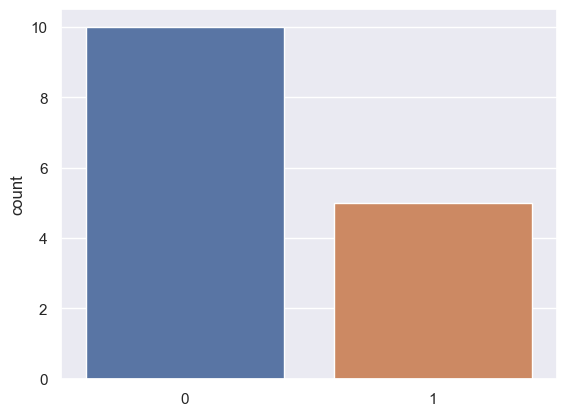

In [200]:
# Parameters
p = 0.3

# Create a Bernoulli Distribution
bernoulli = stats.bernoulli(p)

# PMF for x = 0 and x = 1
# Probability of Failure
pmf_0 = bernoulli.pmf(0)
# Probability of Success
pmf_1 = bernoulli.pmf(1)

print(f"PMF at \n\tx=0:{pmf_0}\n\tx=1:{pmf_1}")

# Mean and Variance
print(f"Mean={bernoulli.mean()}")
print(f"Var={bernoulli.var()}")

# Generate random Samples
size = 15
samples = bernoulli.rvs(size)

# Plot Distribution
sns.countplot(x=samples)
plt.show()

### Binomial Distribution:
**Type**:Discrete.<br>
**Parameters**:<ul><pre>
n:number of trails.
p:probabiltiy of success (0 <= p <= 1)</ul>
**Notation**:<ul><pre>
    X ~ Binom(n,p).</ul>
**Range**:{0,1,2,...,n}(possible number of success).<br>
**Formulas**:<ul><pre>
**PMF**: P(X = x) = Cnx * (p\*\*x)*(1-p)**(n-x).
**CDF**: F(X <= x) = {∑(i=0 --> x) P(X=i)}</ul>
**Shape**:Depends on the value of **p** and **n**.if **p** is near 0.5 and **n** is large,it looks symmetric;otherwise,it can be skewed.<br>
**Mean**:n*p.<br>
**Variance**: np(1-p).<br>
**Use Cases**:Modeling the number of successes in **n** independent trails.<br>

PMF at
	x=7:0.20132659199999978
CDF at
	x=7:0.32220047359999987
Mean=8.0
Var=1.5999999999999996


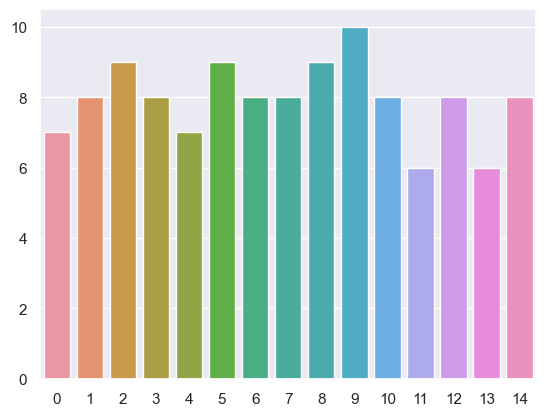

In [221]:
# Parameters
n = 10
p = 0.8

# Create a Binomial Distribution
binomial = stats.binom(n=n,p=p)

# PMF for 7 successes 
pmf_7 = binomial.pmf(7)

# CDF for 5 successes
cdf_7 = binomial.cdf(7)

print(f"PMF at\n\tx=7:{pmf_7}")
print(f"CDF at\n\tx=7:{cdf_7}")

# Mean and Variance
print(f"Mean={binomial.mean()}")
print(f"Var={binomial.var()}")

# Generate random Samples
size = 15
x = np.arange(size)
samples = binomial.rvs(size)

# Plots Distribution
sns.barplot(x=x,y=samples)
plt.show()

### Poisson Distribution:
**Type**:Discrete<br>
**Parameters**:<ul><pre>
λ (lambda):the **rate** parameter,representing the average number of events in a fixed interval.</ul>
**Notation**:<ul><pre>
    X ~ Poisson(λ).</ul>
**Range**:{0,1,2,...}(non-negative integers).<br>
**Shape**:Right-Skewred;as **λ** increases,it becomes more symmetric.<br>
**Formulas**:<ul><pre>
**PMF**: P(X = x) = ((e-λ)*λ\**x)/(x!).
**CDF**: F(X <= x) = {∑(i=0 --> x) P(X=i)}</ul>
**Mean**:λ<br>
**Variance**:λ<br>
**Use Cases**:Modeling the number of events in a fixed time peroid or space(eg:number of calls in a call center per hour)
-Situations where events occur indepedently and at a constant rate.<br>

PMF at
	x=36:0.06540449261075311
CDF at
	x=36:0.6101964945804425
Mean=35.0
Var=35.0


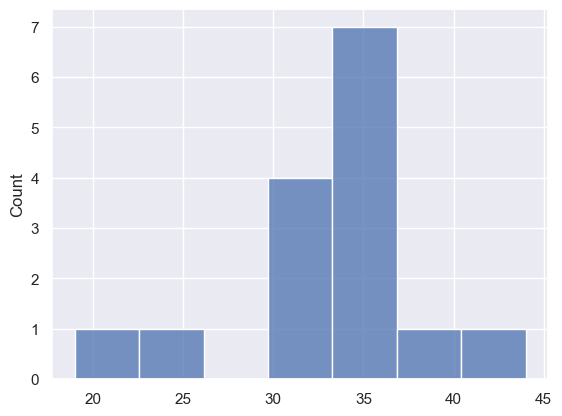

In [256]:
# Parameters 
lam = 35

# Create a Poisson Distribution
poisson = stats.poisson(mu=lam)

# PMF for 36 events
pmf_2 = poisson.pmf(36)

# PDF for 36 events
cdf_2 = poisson.cdf(36) 

print(f"PMF at\n\tx=36:{pmf_2}")
print(f"CDF at\n\tx=36:{cdf_2}")

# Mean and Variance
print(f'Mean={poisson.mean()}')
print(f'Var={poisson.var()}')

# Generate Samples
size = 15
samples = poisson.rvs(size)

# Plot Dist
sns.histplot(samples)
plt.show()

### Geometric Distribution:
**Type**:Discrete<br>
**Parameters**:<ul><pre>
p:probability of success in each trail 0 < **p** <= 1.</ul>
**Notation**:<ul><pre>
    X ~ Geom(p).</ul>
**Range**:1,2,3,...(represents the number of trails until the first success).<br>
**Formulas**:<ul><pre>
**PMF**: P(X = x) = p*(1-p)**(x-1).
**CDF**: F(X <= x) = {∑(i=0 --> x) P(X=i)}</ul>
**Shape**:Right-Skewred;the probability decreases as the number of trails increases.<br>
**Mean**:1/p<br>
**Variance**:(1-p)/p<br>
**Use Cases**:Modeling the number of trails required ti get the first success in a serise of independent bernoulli trails.

PMF at
	x=5:0.015360000000000002
CDF at
	x=5:0.98976
Mean=1.6666666666666667
Var=1.1111111111111114


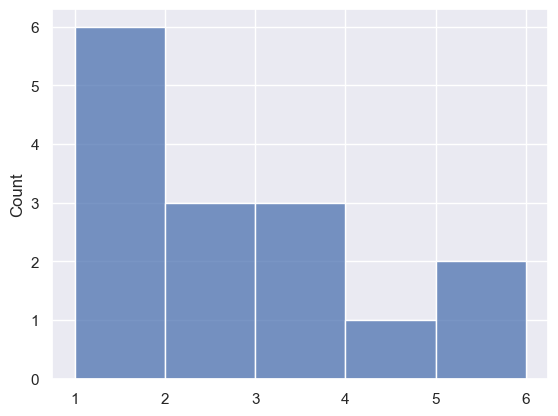

In [356]:
# Parameters 
p = 0.6

# Create Geometric Distribution
geom = stats.geom(p=p)

# PMF 
pmf = geom.pmf(5)

# CDF
cdf = geom.cdf(5)

print(f"PMF at\n\tx=5:{pmf}")
print(f"CDF at\n\tx=5:{cdf}")

# Mean and Variance
print(f'Mean={geom.mean()}')
print(f'Var={geom.var()}')

# Generate Samples
size = 15
samples = geom.rvs(size)

# Plot Dist
sns.histplot(samples)
plt.show()

### Normal (Gaussian) Distribution:
**Type**:Continuous<br>
**Parameters**:<ul><pre>
μ(mu):Mean(**location** parameter,the **center** of the distribution).
σ2(sigma squared):Variance(**scale** parameter,how **spread** out the distribution is).</ul>
**Notation**:<ul><pre>
    X ~ N(ų,σ2).</ul>
**Range**:(-inf,inf)<br>
**Formulas**:<ul><pre>
**PMF**: P(x) = (1/(σ\*sqrt(2\*pi))) \* e(-.5*((x-μ)/σ)\**2).
**CDF**: F(x) = ∫(-inf --> x) P</ul>
**Shape**:Bell-shaped,symmetric around the mean.<br>
**Mean**:μ<br>
**Variance**:σ2<br>
**Use Cases**:Widely used in model natural phenomena.<br>

PDF at
	x=0:0.3989422804014327
CDF at
	x=0:0.5
Mean=0.0
Var=1.0


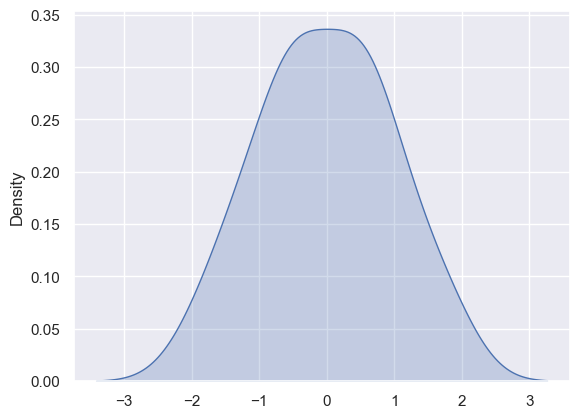

In [270]:
# Parameters 
mu = 0
sigma = 1 # Standard Deviation

# Create a Normal Distribution
norm = stats.norm(loc=mu,scale=sigma)

# PDF for x = 0
pdf_0 = norm.pdf(0)

# CDF for x = 0
cdf_0 = norm.cdf(0)

print(f"PDF at\n\tx=0:{pdf_0}")
print(f"CDF at\n\tx=0:{cdf_0}")

# Mean and Variance
print(f"Mean={norm.mean()}\nVar={norm.var()}")

# Generate Samples
size = 30
samples = norm.rvs(size)

# Plot Distribution
sns.kdeplot(samples,fill=True)
plt.show()

### Student's-t Distribution:
**Type**:Continuous<br>
**Parameters**:<ul><pre>
ν:Degrees of Freedom(df).</ul>
**Notation**:<ul><pre>
    X ~ t(ν).</ul>
**Range**:(-inf,inf)<br>
**Formulas**:<ul><pre>
**PMF**: P(x) = (gamma((v+1)/2) / (sqrt(v\*pi) \* gamma(v/2))) * (1+(x\**2)/v)**(-(v+1)/2).
**CDF**: F(x) = ∫(-inf --> x) P </ul>
**Shape**:Bell-shaped and symmetric, similar to the normal distribution,but with heavier tails(the lower the degrees of freedom,the heavier the tails).<br>
**Mean**:0(for ν > 1).<br>
**Variance**:ν / (ν-2) for ν > 2,undefined for ν <= 2.<br>
**Use Cases**:often used in hypothesis testing (eg:t-tests).<br>
Provides more accurate results than the normal distribution when sample size are small or data has heavier tails.

PDF at
	x=0:0.02297203730924134
CDF at
	x=0:0.5
Mean=0.0
Var=3.0


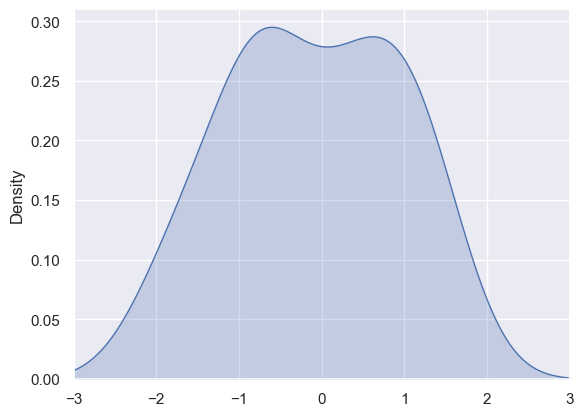

In [296]:
# Parameters 
df = 3

# Create a Student's-t Distribution
stud = stats.t(df=df)

# PDF for x = 0
pdf_0 = stud.pdf(-3)

# CDF for x = 0
cdf_0 = stud.cdf(0)

print(f"PDF at\n\tx=0:{pdf_0}")
print(f"CDF at\n\tx=0:{cdf_0}")

# Mean and Variance
print(f"Mean={stud.mean()}\nVar={stud.var()}")

# Generate Samples
size = 30
samples = stud.rvs(size)

# Plot Distribution
sns.kdeplot(samples,fill=True)
plt.xlim((-3,3))
plt.show()

### Chi-Squared Distribution:
**Type**:Continuous<br>
**Parameters**:<ul><pre>
k:Degrees of Freedom(df).</ul>
**Notation**:<ul><pre>
    X ~ X2(k).</ul>
**Range**:[0,+inf)<br>
**Formulas**:<ul><pre>
**PMF**: P(x) = (x\**2((k/2)-1) \* e(-x/2)) / (2**(k/2) * gamma(k/2)).
**CDF**: F(x) = ∫(0 --> x) P </ul>
**Shape**:Right-skewred,with the skew decreasing as the degrees of fredoom increase.<br>
**Mean**:k.<br>
**Variance**:2k<br>
**Use Cases**:Used in hypothesis testing especially in the chi-squared test for independence and goodness of fit.<br>

PDF at
	x=10:0.028334555341734475
CDF at
	x=10:0.9247647538534878
Mean=5.0
Var=10.0


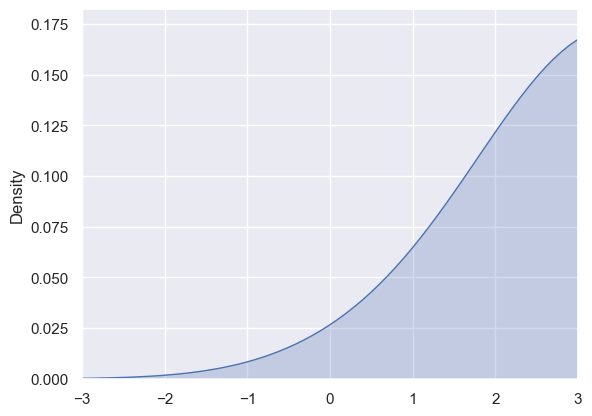

In [303]:
# Parameters
k = 5

# Create Chi-Squared Distribution
chi2 = stats.chi2(df=k)

# PDF for x = 10
pdf_10 = chi2.pdf(10)

# CDF for x = 10
cdf_10 = chi2.cdf(10)

print(f"PDF at\n\tx=10:{pdf_10}")
print(f"CDF at\n\tx=10:{cdf_10}")

# Mean and Variance
print(f"Mean={chi2.mean()}\nVar={chi2.var()}")

# Generate Samples
size = 30
samples = chi2.rvs(size)

# Plot Distribution
sns.kdeplot(samples,fill=True)
plt.xlim((-3,3))
plt.show()

### Exponential Distribution:
**Type**:Continuous<br>
**Parameters**:<ul><pre>
λ (lambda):rate parameter,λ > 0.
OR Alternatively
β (beta) = 1/λ (scale parameter).</ul>
**Notation**:<ul><pre>
    X ~ Exp(λ).</ul>
**Range**:[0,+inf)<br>
**Formulas**:<ul><pre>
**PMF**: P(x) = λ * e(-λ*x).
**CDF**: F(x) = 1 - e(-λ*x).</ul>
**Shape**:Right-skewred,decreasing exponentially.<br>
**Mean**:1/λ.<br>
**Variance**:1/λ**2<br>
**Use Cases**:Used to model the time between independent events that occur at a constant average rate(eg:time between customer arrivals).

PDF at:
	x=9:0.04065696597405991
CDF at:
	x=20:0.8646647167633873

Mean=10.0
Var=100.0


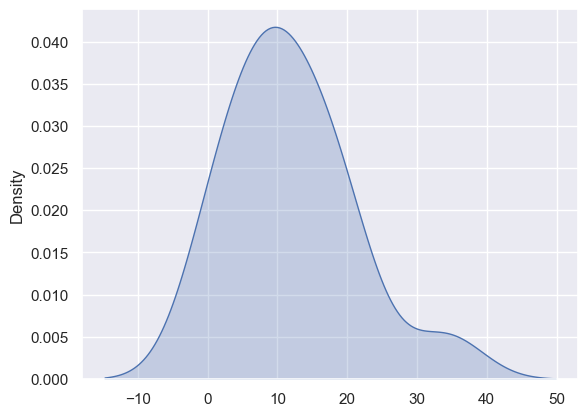

In [338]:
# Parameters
lam = 10
scale = 1/10

# Create Exponential Distribution
expon = stats.expon(scale=1/scale)

# PDF
pdf = expon.pdf(9)

# CDF
cdf = expon.cdf(20)

print(f"PDF at:\n\tx=9:{pdf}")
print(f"CDF at:\n\tx=20:{cdf}\n")

# Mean and Variance
print(f"Mean={expon.mean()}\nVar={expon.var()}")

# Generate Samples
size = 15
samples = expon.rvs(size)

# Plot
sns.kdeplot(samples,fill=True)
plt.show()

### Logistic Distribution:
**Type**:Continuous<br>
**Parameters**:<ul><pre>
μ(**location** parameter):determines the **center** of the distribution.
s(**scale** parameter):controls the spread,**s** > 0 .</ul>
**Notation**:<ul><pre>
    X ~ Logistic(μ,s).</ul>
**Range**:(-inf,inf)<br>
**Formulas**:<ul><pre>
**PMF**: P(x) = (e(-(x-μ)/s)) / (s*(1+e(-(x-μ) / s))*\*2).
**CDF**: F(x) = 1 / (1+e(-(x-μ) /s)).</ul>
**Shape**:Symmetric,bell shaped like th normal disribution but with heavier tails.<br>
**Mean**:μ.<br> 
**Variance**:(pi**2)*(s**2)/3<br>
**Use Cases**:Common in Logistic Regression,modeling binary outcomes.

PDF at
	x=9:0.09830596662074093
CDF at
	x=13:0.7310585786300049
Mean=11.0
Var=13.159472534785811


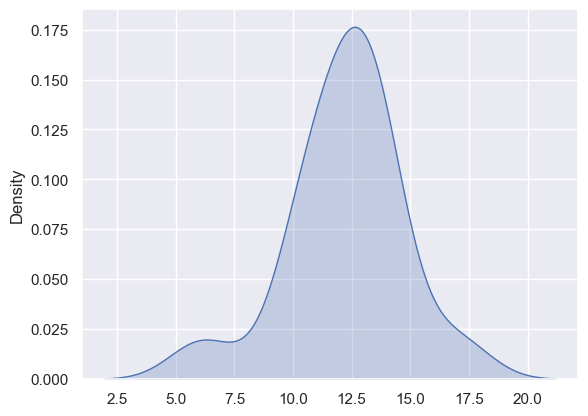

In [351]:
# Parameters
mu = 11
s = 2

# Create Logistic Distribution
logistic = stats.logistic(loc=mu,scale=s)

# PDF
pdf = logistic.pdf(9)

# CDF
cdf = logistic.cdf(13)

print(f"PDF at\n\tx=9:{pdf}")
print(f"CDF at\n\tx=13:{cdf}")

# Mean and Variance
print(f"Mean={logistic.mean()}\nVar={logistic.var()}")

# Generate Samples
size = 15
samples = logistic.rvs(size)

# Plot Distribution
sns.kdeplot(samples,fill=True)
plt.show()

### 68,95,99.7 Law:
or **the Empirical Rule**,stats that for a normal distribution:<ul><pre>
**68%** of the data falls within 1 standard deviation of the mean.
**95%** within 2 standard deviations.
**99.7%** within 3 standard deviations.

In [479]:
# Create Normal Disribution
loc = 1
scale = 2
size = 30
norm = stats.norm(loc=loc,scale=scale).rvs(size)


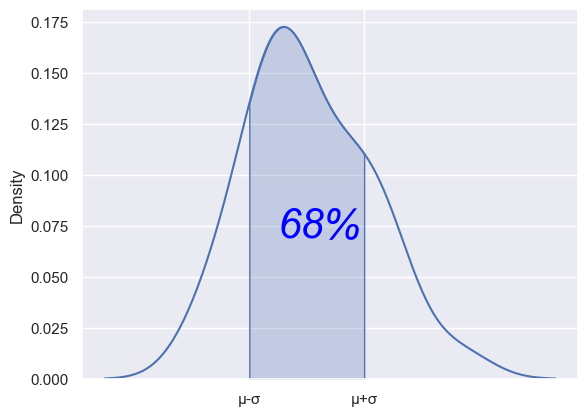

In [480]:
# Plot 68%
sns.kdeplot(norm)
sns.kdeplot(norm,fill=True,clip=(loc-scale,loc+scale))
plt.text(x=loc-1,y=0.07,s='68%',fontdict=dict(size=30,color='blue',style='oblique'))
plt.xticks(ticks=[loc-scale,loc+scale],labels=['μ-σ','μ+σ'])
plt.show()

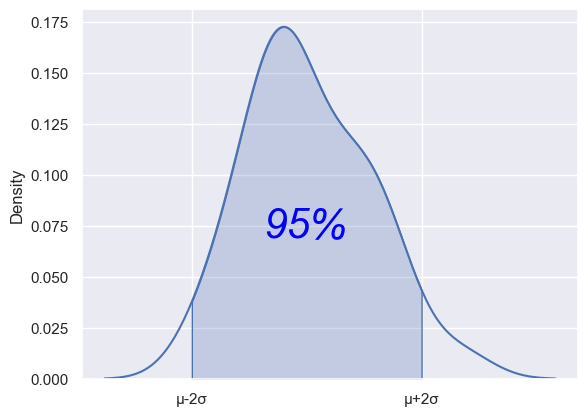

In [481]:
# Plot 95%
sns.kdeplot(norm)
sns.kdeplot(norm,fill=True,clip=(loc-2*scale,loc+2*scale))
plt.text(x=loc-1.5,y=0.07,s='95%',fontdict=dict(size=30,color='blue',style='oblique'))
plt.xticks(ticks=[loc-2*scale,loc+2*scale],labels=['μ-2σ','μ+2σ'])
plt.show()

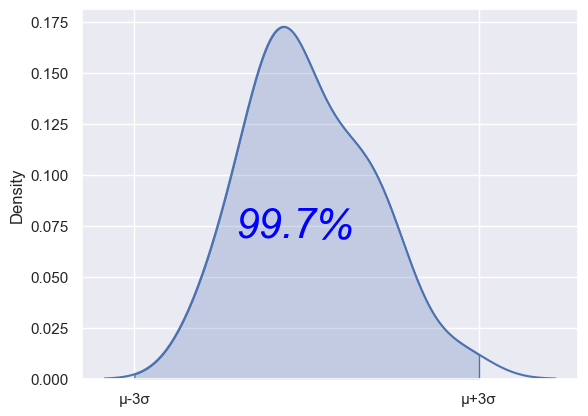

In [482]:
# Plot 99.7%
sns.kdeplot(norm)
sns.kdeplot(norm,fill=True,clip=(loc-3*scale,loc+3*scale))
plt.text(x=loc-2.5,y=0.07,s='99.7%',fontdict=dict(size=30,color='blue',style='oblique'))
plt.xticks(ticks=[loc-3*scale,loc+3*scale],labels=['μ-3σ','μ+3σ'])
plt.show()

## Transformation:
A way in which we can **alter every element** of a distribution to get a **new distribution**.<br>
<pre> + | - | x | / : X ~ N(μ,σ²)<br>
<b>if</b> X ~ N(μ1,σ²1)<br>
<b>then</b> X + 3 ~ N(μ2,σ²2)

### Multiplication and division:

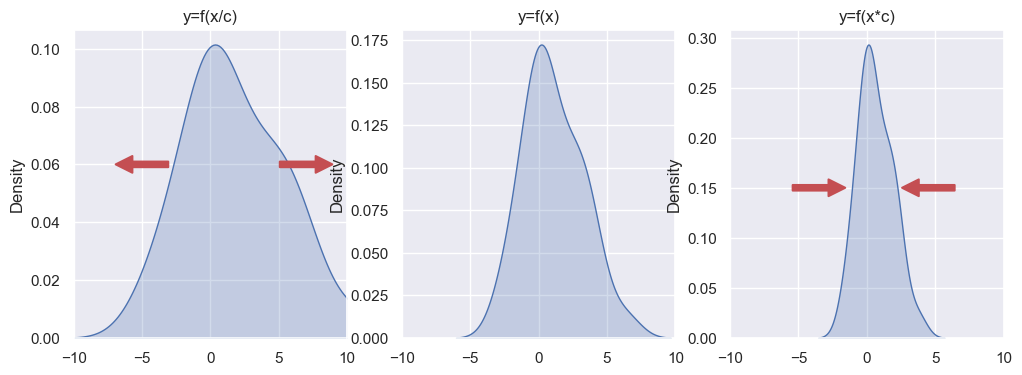

In [513]:
fig,ax = plt.subplots(1,3,figsize=(12,4))

xrange = (-10,10)
c = 1.7
# Normal
sns.kdeplot(norm,ax=ax[1],fill=True)
ax[1].set_title('y=f(x)')
ax[1].set_xlim(xrange)

# Division
sns.kdeplot(norm*c,ax=ax[0],fill=True)
ax[0].annotate(text='',xy=(-7,0.06),xytext=(-3,0.06),arrowprops =dict(color='r',shrink=0.02,lw =1.5))
ax[0].annotate(text='',xy=(9,0.06),xytext=(5,0.06),arrowprops =dict(color='r',shrink=0.02,lw =1.5))
ax[0].set_title('y=f(x/c)')
ax[0].set_xlim(xrange)


# Multiplication
sns.kdeplot(norm/c,ax=ax[2],fill=True)
ax[2].annotate(text='',xy=(-1.5,0.15),xytext=(-5.5,0.15),arrowprops =dict(color='r',shrink=0.02,lw =1.5))
ax[2].annotate(text='',xy=(2.5,0.15),xytext=(6.5,0.15),arrowprops =dict(color='r',shrink=0.02,lw =1.5))
ax[2].set_title('y=f(x*c)')
ax[2].set_xlim(xrange)
plt.show()

**!!**:if 1 > C > 0, the operation will be reversed.<br>
eg:x/0.5 = 2x.

## Standardizing:
is the process of converting data to have a **mean of 0** and **standard deviation of 0** bu subtracting the mean and dividing by the standard deviation.<br>
Allow us to directly apply the Empirical Rule.it means that we can easily determine the propotion of data within 1,2 or standard deviation from mean using **CDF Table(Z-score table)**.<br>
**Notation**:<ul><pre>
Y ~ N(μ,σ²) 
if :Z = (Y - μ) / σ
then :Z ~ N(0,1)</ul>
**Drawbacks**:<ul><pre>
-Usefull when we have a Normal Distribution but Not always the case.
-It requires a lot of data.
-Risk of outliers drastically affecting our analysis.